In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score

In [2]:
data = pd.read_csv("../input/salary-prediction-classification/salary.csv")

In [3]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
for i in data.columns:
    print("Column : ",i)
    print("\n")
    print(data[i].value_counts())
    print("\n")

Column :  age


36    898
31    888
34    886
23    877
35    876
     ... 
83      6
88      3
85      3
86      1
87      1
Name: age, Length: 73, dtype: int64


Column :  workclass


 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64


Column :  fnlwgt


164190    13
203488    13
123011    13
148995    12
121124    12
          ..
232784     1
325573     1
140176     1
318264     1
257302     1
Name: fnlwgt, Length: 21648, dtype: int64


Column :  education


 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th    

## Data Preprocessing

In [5]:
data['workclass'] = data['workclass'].replace(' ?', np.nan)
data['occupation'] = data['occupation'].replace(" ?", np.nan)
data['native-country'] = data['native-country'].replace(" ?", np.nan)

In [6]:
data.isna().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
salary               0
dtype: int64

In [7]:
data = data.dropna(how="any")

In [8]:
data.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64

## Exploratory Data Analysis

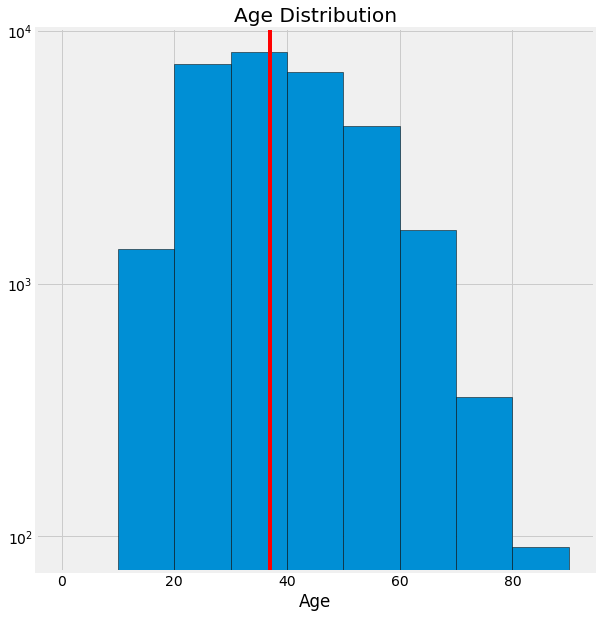

In [9]:
plt.figure(figsize=(10,10))
plt.style.use("fivethirtyeight")
bins = range(0,100, 10)
plt.hist(data.age, bins=bins, edgecolor = "black", log = True)
plt.axvline(data.age.median(), color = "red")
plt.title("Age Distribution")
plt.xlabel("Age")
plt.show()

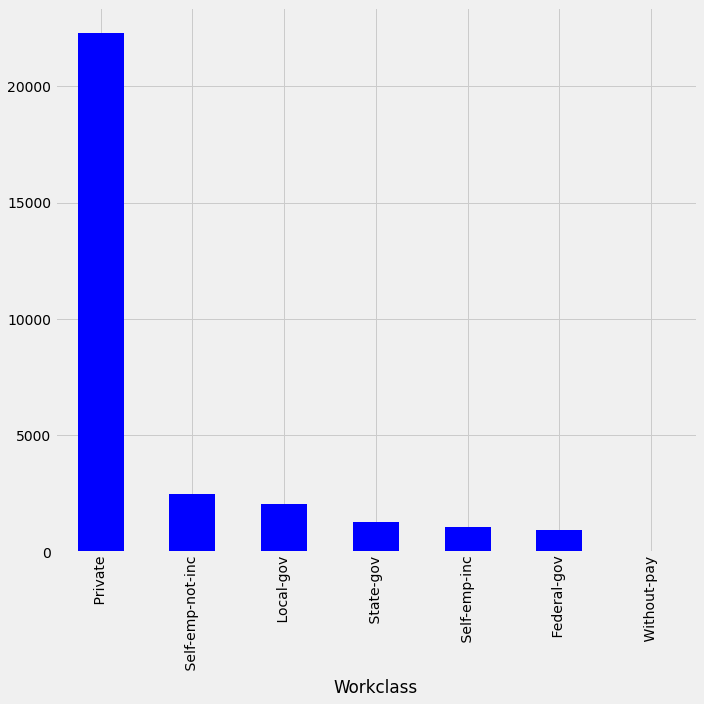

In [10]:
plt.figure(figsize=(10,10))
data.workclass.value_counts().plot(kind="bar", color="blue")
plt.xlabel("Workclass")
plt.tight_layout()
plt.show()

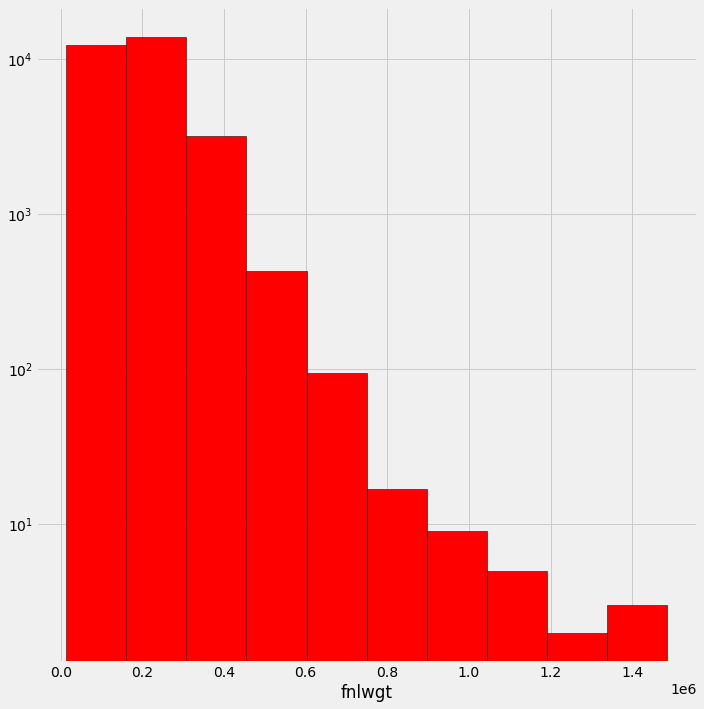

In [11]:
plt.figure(figsize=(10,10))
plt.hist(data.fnlwgt, edgecolor="black", color="red", log=True)
plt.tight_layout()
plt.xlabel("fnlwgt")
plt.show()

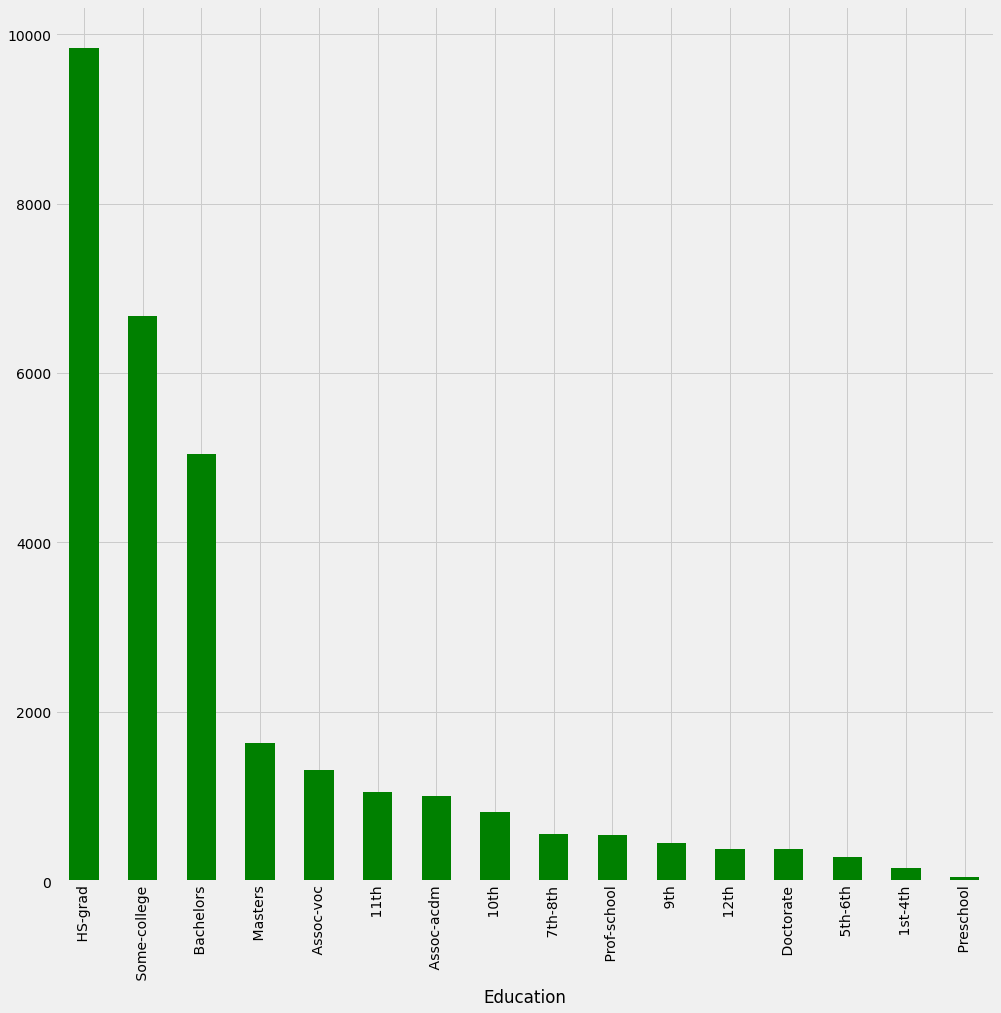

In [12]:
plt.figure(figsize=(15,15))
data['education'].value_counts().plot(kind='bar', color = "green")
plt.xlabel("Education")
plt.show()

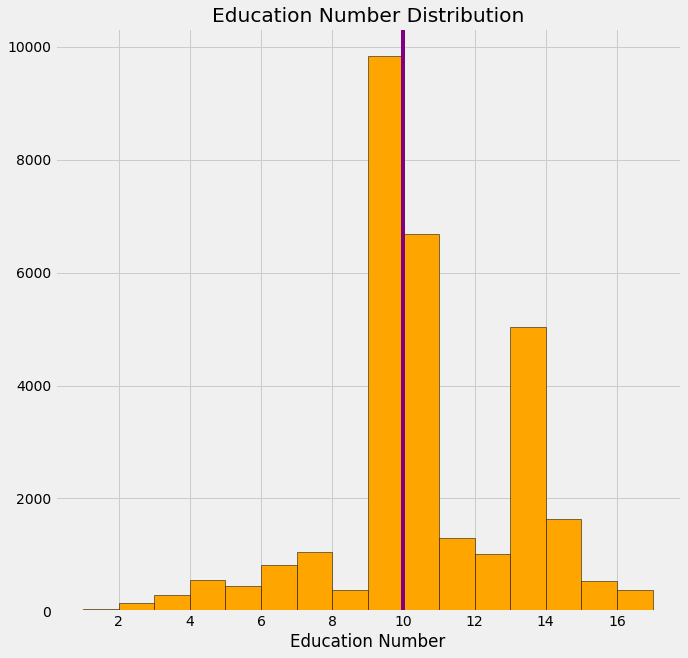

In [13]:
plt.figure(figsize=(10,10))
bins = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]
plt.hist(data["education-num"], edgecolor="black", bins = bins, color = "orange")
plt.axvline(data["education-num"].median(), color="purple")
plt.title("Education Number Distribution")
plt.xlabel("Education Number")
plt.show()

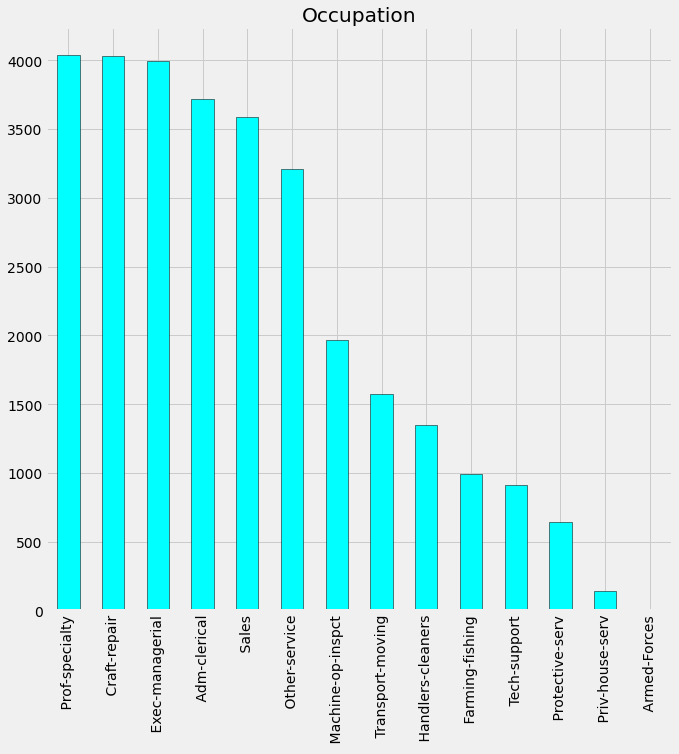

In [14]:
plt.figure(figsize=(10,10))
data['occupation'].value_counts().plot(kind="bar", color = "cyan", edgecolor="black")
plt.title("Occupation")
plt.show()

In [15]:
data = data.loc[:, ['workclass',"fnlwgt","education","education-num","occupation",
                   "capital-gain","capital-loss","hours-per-week","native-country","salary"]]

In [16]:
data.head()

,workclass,fnlwgt,education,education-num,occupation,capital-gain,capital-loss,hours-per-week,native-country,salary
0,State-gov,77516,Bachelors,13,Adm-clerical,2174,0,40,United-States,<=50K
1,Self-emp-not-inc,83311,Bachelors,13,Exec-managerial,0,0,13,United-States,<=50K
2,Private,215646,HS-grad,9,Handlers-cleaners,0,0,40,United-States,<=50K
3,Private,234721,11th,7,Handlers-cleaners,0,0,40,United-States,<=50K
4,Private,338409,Bachelors,13,Prof-specialty,0,0,40,Cuba,<=50K


In [17]:
lab_enc = LabelEncoder()

data['workclass'] = lab_enc.fit_transform(data['workclass'])
data['education'] = lab_enc.fit_transform(data['education'])
data['occupation'] = lab_enc.fit_transform(data['occupation'])
data['native-country'] = lab_enc.fit_transform(data['native-country'])
data['salary'] = lab_enc.fit_transform(data['salary'])

In [18]:
data.head()

,workclass,fnlwgt,education,education-num,occupation,capital-gain,capital-loss,hours-per-week,native-country,salary
0,5,77516,9,13,0,2174,0,40,38,0
1,4,83311,9,13,3,0,0,13,38,0
2,2,215646,11,9,5,0,0,40,38,0
3,2,234721,1,7,5,0,0,40,38,0
4,2,338409,9,13,9,0,0,40,4,0


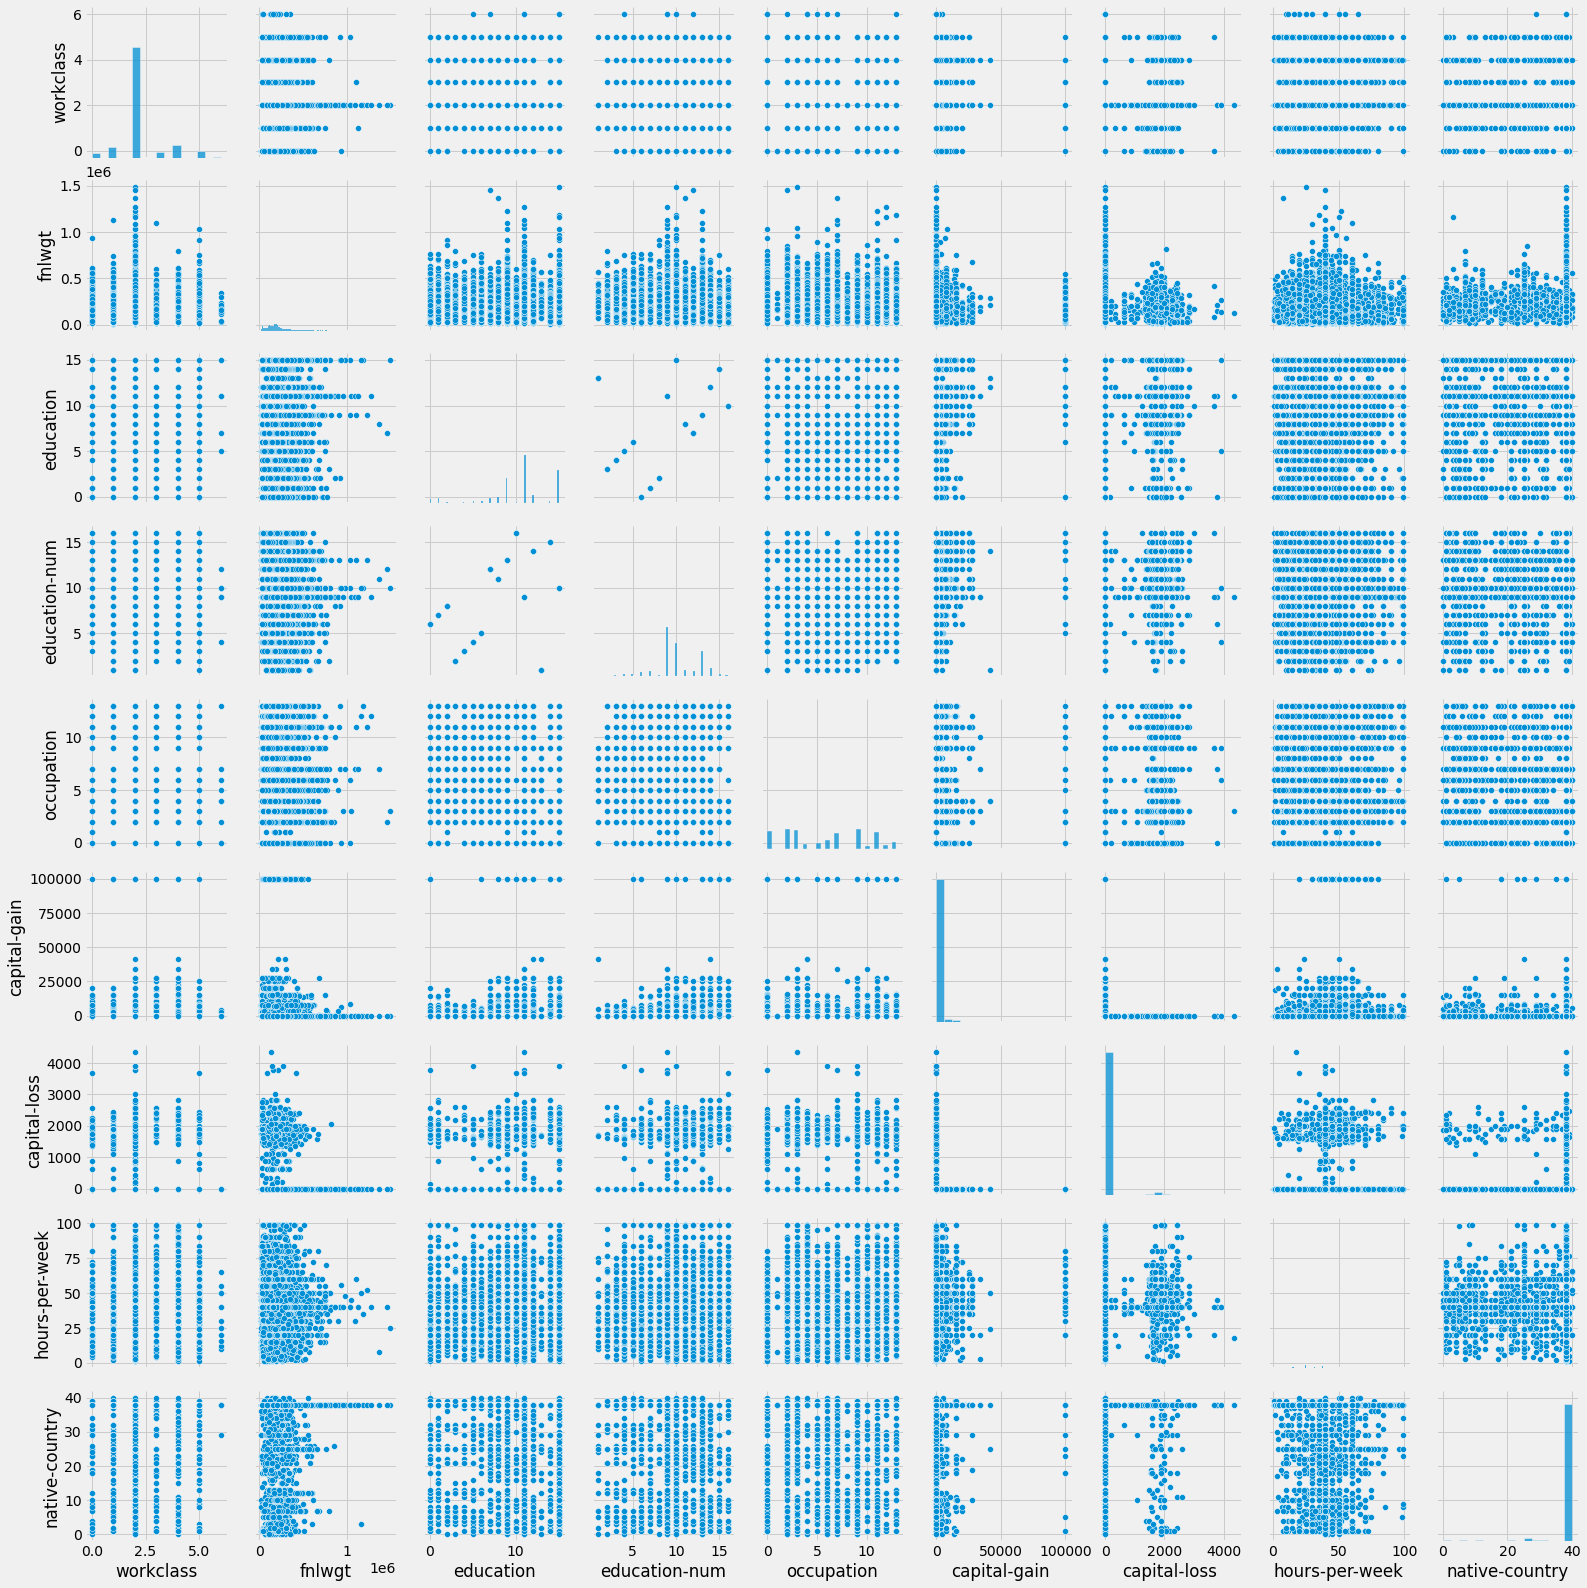

In [19]:
sns.pairplot(data.drop("salary", axis=1))
plt.show()

In [20]:
clf = RandomForestClassifier(n_estimators = 200, criterion="gini", max_depth = 6)

In [21]:
X = data.iloc[:, 0:-1]
y = data.iloc[:, -1]

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [23]:
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=6, n_estimators=200)

In [24]:
y_pred = clf.predict(X_test)

In [25]:
print(confusion_matrix(y_pred, y_test))

[[4439  944]
 [ 117  533]]


In [26]:
print(recall_score(y_pred, y_test))

0.82
